In [1]:
from hyperparameters import test_loader, out_to_mask
import torch
from unet import UNet
import matplotlib.pyplot as plt

In [2]:
PATH = 'trained_model/network.pth'
unet = UNet(in_channels=3,
            out_channels=1,
            n_blocks=4,
            start_filters=32,
            activation='relu',
            normalization='batch',
            conv_mode='same',
            dim=2)

In [3]:
unet.load_state_dict(torch.load(PATH))

<All keys matched successfully>

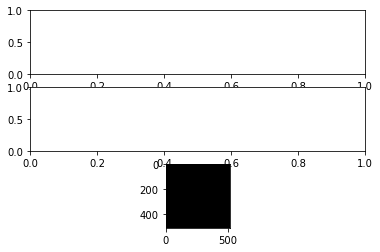

In [4]:
for x,y in test_loader:
    x = torch.permute(x, (0, 3, 2, 1))
    out = torch.squeeze(unet(x)[1])
    out = out_to_mask(out)
    out = out.detach().numpy()




    
    x = torch.permute(x, (0,3,2,1))
    x = x[1]
    x = x.detach().numpy()
    
    y = torch.squeeze(y)[1]
    y = y.detach().numpy()
    
    f, (ax1, ax2,ax3) = plt.subplots(3,1)
    ax1 = plt.imshow(x)
    ax2 = plt.imshow(y, cmap='gray')
    ax3 = plt.imshow(out, cmap='gray')
    break

[]


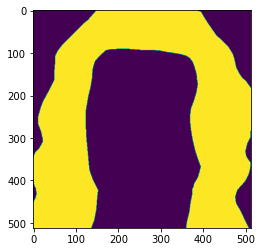

In [6]:
plt.imshow(x)
plt.imshow(y)
print(out[out==0])

In [ ]:
for x,y in test_loader:
    y = torch.squeeze(y)[1]
    y = y.detach().numpy()
    plt.imshow(y, cmap='gray')

In [ ]:
plt.imshow(out, cmap='gray')

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = unet(images)
imshow(outputs[0])